In [1]:
import pandas as pd

file_path = '/Users/tanmaysagarhuria/Downloads/predictions.csv'

Experiment 4: Moving Average Crossover
This strategy involves using short-term and long-term moving averages. A buy signal is typically generated when the short-term moving average crosses above the long-term moving average, indicating a potential upward trend. Conversely, a sell signal is triggered when the short-term moving average crosses below.

In [2]:
predictions_df = pd.read_csv(file_path)

In [3]:
# Calculate moving averages
predictions_df['short_ma'] = predictions_df['Pred_price'].rolling(window=5).mean()  # 5-period moving average
predictions_df['long_ma'] = predictions_df['Pred_price'].rolling(window=20).mean()  # 20-period moving average

# Generate signals
predictions_df['Signal'] = 0
predictions_df.loc[predictions_df['short_ma'] > predictions_df['long_ma'], 'Signal'] = 1
predictions_df.loc[predictions_df['short_ma'] < predictions_df['long_ma'], 'Signal'] = -1


In [4]:
def simulate_trading(df, initial_capital):
    cash = initial_capital
    holdings = 0
    portfolio_values = []

    # Assume the price to use for trading is the predicted price
    for index, row in df.iterrows():
        if row['Signal'] == 1 and cash > 0:  # Buy
            holdings = cash / row['Pred_price']  # Buy as much as possible
            cash = 0
        elif row['Signal'] == -1 and holdings > 0:  # Sell
            cash = holdings * row['Pred_price']
            holdings = 0
        
        # Update portfolio value for each step
        portfolio_value = cash + holdings * row['Pred_price']
        portfolio_values.append(portfolio_value)

    df['Portfolio_Value'] = portfolio_values
    return df

# Starting capital for the simulation
initial_capital = 10000  # Adjust as necessary

# Run the trading simulation
predictions_df = simulate_trading(predictions_df, initial_capital)


In [5]:
def calculate_profit(df, initial_capital):
    final_portfolio_value = df['Portfolio_Value'].iloc[-1]
    profit = final_portfolio_value - initial_capital
    return profit

# Calculate the profit
profit = calculate_profit(predictions_df, initial_capital)
print(f"Initial Capital: ${initial_capital}")
print(f"Final Portfolio Value: ${predictions_df['Portfolio_Value'].iloc[-1]:.2f}")
print(f"Profit or Loss: ${profit:.2f}")


Initial Capital: $10000
Final Portfolio Value: $982253.62
Profit or Loss: $972253.62


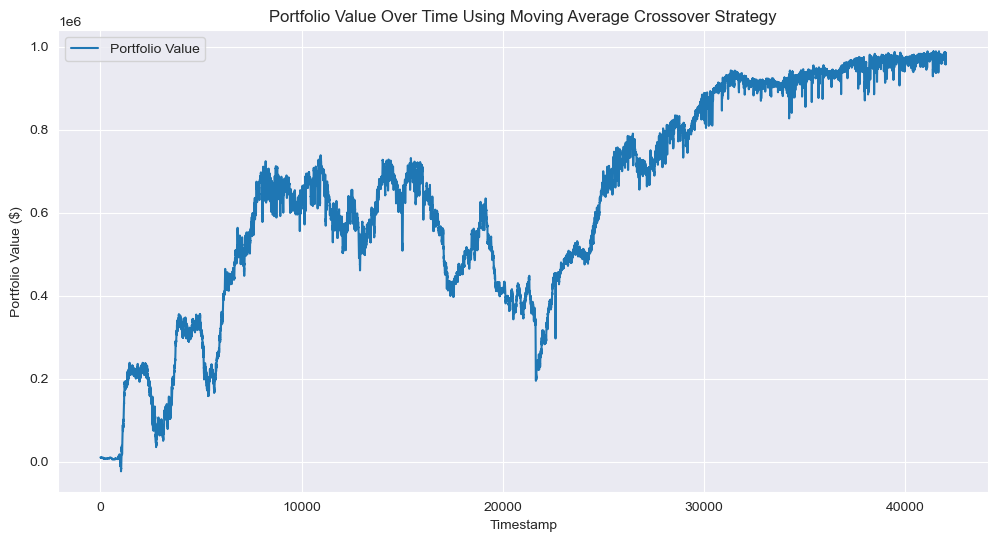

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(predictions_df['Portfolio_Value'], label='Portfolio Value')
plt.title('Portfolio Value Over Time Using Moving Average Crossover Strategy')
plt.xlabel('Timestamp')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()
